In [160]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [161]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import hdstats

from mpl_toolkits.mplot3d import axes3d

In [162]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg'

np.set_printoptions(precision=4, suppress=True, linewidth=120)
plt.style.use('./hdstats.mplstyle')

## Two sample tests of mean

These tests are like multidimensional versions of the t-test

We can use these tests, if we observe two independent samples from the same or different population. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

### Generate some test data with same mean

In [163]:
n1 = n2 = 50

In [164]:
p = 200

In [165]:
mu1 = np.zeros(p)

In [166]:
mu2 = mu1.copy()

In [167]:
true_cov = np.power(0.4, np.absolute(np.subtract.outer(np.arange(p), np.arange(p))))

In [168]:
true_cov[:10,:10]

array([[1.    , 0.4   , 0.16  , 0.064 , 0.0256, 0.0102, 0.0041, 0.0016, 0.0007, 0.0003],
       [0.4   , 1.    , 0.4   , 0.16  , 0.064 , 0.0256, 0.0102, 0.0041, 0.0016, 0.0007],
       [0.16  , 0.4   , 1.    , 0.4   , 0.16  , 0.064 , 0.0256, 0.0102, 0.0041, 0.0016],
       [0.064 , 0.16  , 0.4   , 1.    , 0.4   , 0.16  , 0.064 , 0.0256, 0.0102, 0.0041],
       [0.0256, 0.064 , 0.16  , 0.4   , 1.    , 0.4   , 0.16  , 0.064 , 0.0256, 0.0102],
       [0.0102, 0.0256, 0.064 , 0.16  , 0.4   , 1.    , 0.4   , 0.16  , 0.064 , 0.0256],
       [0.0041, 0.0102, 0.0256, 0.064 , 0.16  , 0.4   , 1.    , 0.4   , 0.16  , 0.064 ],
       [0.0016, 0.0041, 0.0102, 0.0256, 0.064 , 0.16  , 0.4   , 1.    , 0.4   , 0.16  ],
       [0.0007, 0.0016, 0.0041, 0.0102, 0.0256, 0.064 , 0.16  , 0.4   , 1.    , 0.4   ],
       [0.0003, 0.0007, 0.0016, 0.0041, 0.0102, 0.0256, 0.064 , 0.16  , 0.4   , 1.    ]])

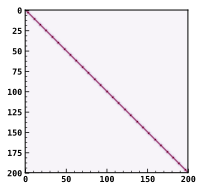

In [169]:
plt.imshow(true_cov)

In [170]:
sam1 = hdstats.MultivariateNormal.rvs(mu1, cov=true_cov, size = n1).T
sam2 = hdstats.MultivariateNormal.rvs(mu2, cov=true_cov, size = n2).T

In [171]:
hdstats.test_sample_means(sam1, sam2)

(2.1733885399315818, 2.720126375543863e-05)

In [172]:
hdstats.test_sample_means(sam1, sam2, 'BaiSarandasa')

(5.275502427408562, 6.619642944905024e-08)

In [173]:
hdstats.test_sample_means(sam1, sam2, 'ChenQin')

(5.275502427408562, 6.619642944905024e-08)

#### Testing with geometric medians

In [174]:
hdstats.test_sample_geomedians(sam1, sam2)

(94.50495470420466, 0.00014573033991316375)

### Generate some test data with slightly different mean

In [175]:
n1 = n2 = 50

In [176]:
p = 200

In [177]:
mu1 = np.zeros(p)

In [178]:
mu2 = mu1.copy()
mu2[:50] = 0.2

In [179]:
true_cov = np.power(0.4, np.absolute(np.subtract.outer(np.arange(p), np.arange(p))))

In [180]:
sam1 = hdstats.MultivariateNormal.rvs(mu1, cov=true_cov, size = n1).T
sam2 = hdstats.MultivariateNormal.rvs(mu2, cov=true_cov, size = n2).T

In [181]:
hdstats.test_sample_means(sam1, sam2)

(3.543133067755036, 2.513655950053817e-12)

In [182]:
hdstats.test_sample_means(sam1, sam2, 'BaiSarandasa')

(10.571483089088456, 0.0)

In [183]:
hdstats.test_sample_means(sam1, sam2, 'ChenQin')

(10.571483089088453, 0.0)

#### Testing with geometric medians

In [184]:
hdstats.test_sample_geomedians(sam1, sam2)

(132.4708857715608, 2.176534508180339e-09)